# IS Project: Two-Phase AI-ML System for Credit Risk Assessment

## Step 1: Load and Inspect Dataset

Load the dataset and display basic structure and sample records.


In [1]:
import pandas as pd

df = pd.read_csv("corrected_dataset.csv")
print("Shape:", df.shape)
df.head()


Shape: (67463, 35)


,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Verification Status,...,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Employment Duration,Home Ownership
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,Not Verified,...,0,INDIVIDUAL,49,0,31,311301,6619,0,176346.62670,MORTGAGE
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,Source Verified,...,0,INDIVIDUAL,109,0,53,182610,20885,0,39833.92100,RENT
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,Source Verified,...,0,INDIVIDUAL,66,0,34,89801,26155,0,91506.69105,MORTGAGE
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,Source Verified,...,0,INDIVIDUAL,39,0,40,9189,60214,0,108286.57590,MORTGAGE
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,Source Verified,...,0,INDIVIDUAL,18,0,430,126029,22579,0,44234.82545,MORTGAGE


## Step 2: Data Summary and Missing Values

Display column data types, descriptive statistics, and check for missing values.


In [2]:
df.info()
df.describe(include='all')
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Verification Status           67463 non-null  object 
 10  Payment Plan                  67463 non-null  object 
 11  Loan Title                    67463 non-null  object 
 12  Debit to Income               67463 non-null  float64
 13  D

ID                              0
Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Verification Status             0
Payment Plan                    0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay                   0
Accounts Delinquent             0
Total Collecti

### Reposition Target Column

Move `Loan Status`, the target variable, to the end of the dataset to maintain a clear structure before continuing further analysis.


In [3]:
target = df['Loan Status']
df = df.drop(columns=['Loan Status'])
df['Loan Status'] = target


## Step 3: Feature Types and Value Distributions

Identify numerical and categorical features, and inspect the unique values in categorical columns.


In [4]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

for col in categorical_cols:
    print(f"\n{col} - Unique values:")
    print(df[col].value_counts())


Numerical columns: ['ID', 'Loan Amount', 'Funded Amount', 'Funded Amount Investor', 'Term', 'Interest Rate', 'Debit to Income', 'Delinquency - two years', 'Inquires - six months', 'Open Account', 'Public Record', 'Revolving Balance', 'Revolving Utilities', 'Total Accounts', 'Total Received Interest', 'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee', 'Collection 12 months Medical', 'Last week Pay', 'Accounts Delinquent', 'Total Collection Amount', 'Total Current Balance', 'Total Revolving Credit Limit', 'Employment Duration', 'Loan Status']
Categorical columns: ['Batch Enrolled', 'Grade', 'Sub Grade', 'Verification Status', 'Payment Plan', 'Loan Title', 'Initial List Status', 'Application Type', 'Home Ownership']

Batch Enrolled - Unique values:
Batch Enrolled
BAT3873588    3626
BAT1586599    3142
BAT1104812    2996
BAT2252229    2557
BAT2803411    2425
BAT1780517    2403
BAT1184694    2298
BAT2078974    2290
BAT2575549    2257
BAT4694572    2248
BAT4271519    2054
BAT

### Drop Identifier Column

The `ID` column is a unique identifier and carries no predictive value. It should be removed immediately to prevent data leakage or noise during analysis and modeling.


In [5]:
if 'ID' in df.columns:
    df = df.drop(columns=['ID'])


### Drop Irrelevant Identifier Columns

Remove high-cardinality categorical features that do not contribute to model performance.


In [6]:
df.drop(columns=["Batch Enrolled"], inplace=True)

### Convert Target to Categorical

Convert `Loan Status` to a categorical feature to ensure proper handling during visualization and analysis.


In [7]:
df['Loan Status'] = df['Loan Status'].astype('object')


## Step 4: Explore Distributions of Numerical and Categorical Features

Visualize the distributions of all numerical and categorical features to examine their scale, skewness, class balance, and suitability for modeling. This analysis helps identify the need for encoding, transformation, or feature selection.


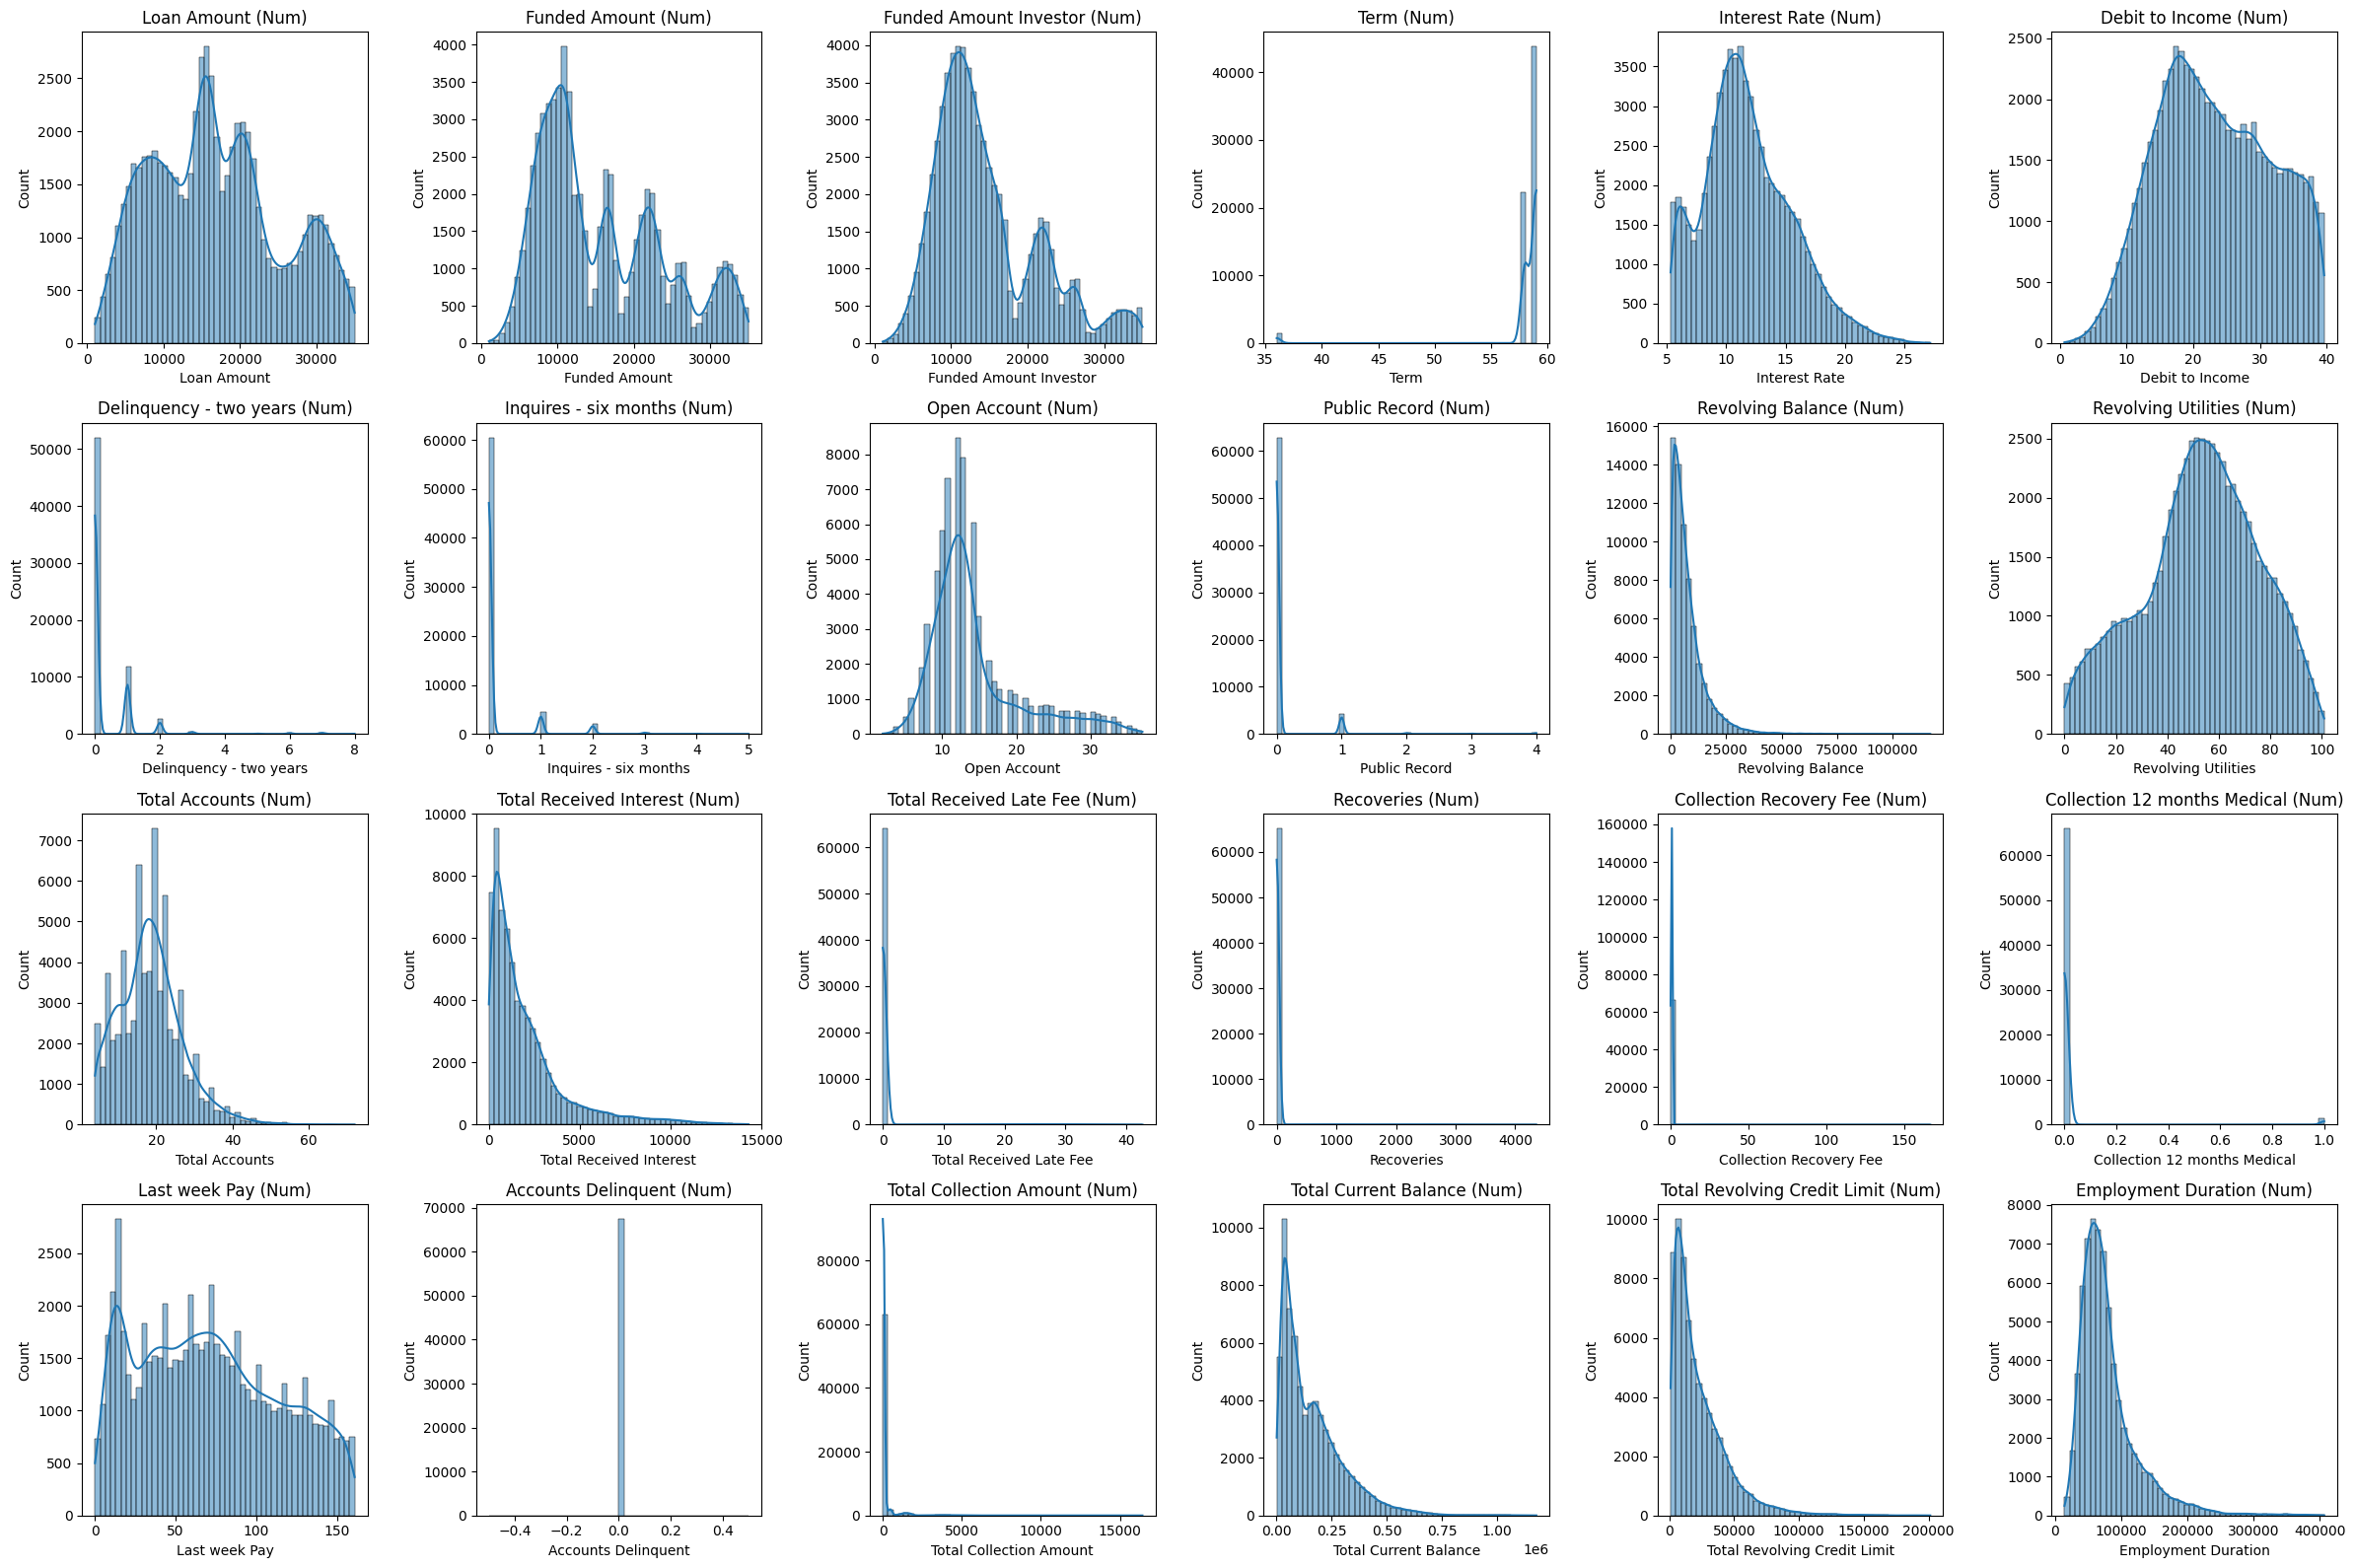

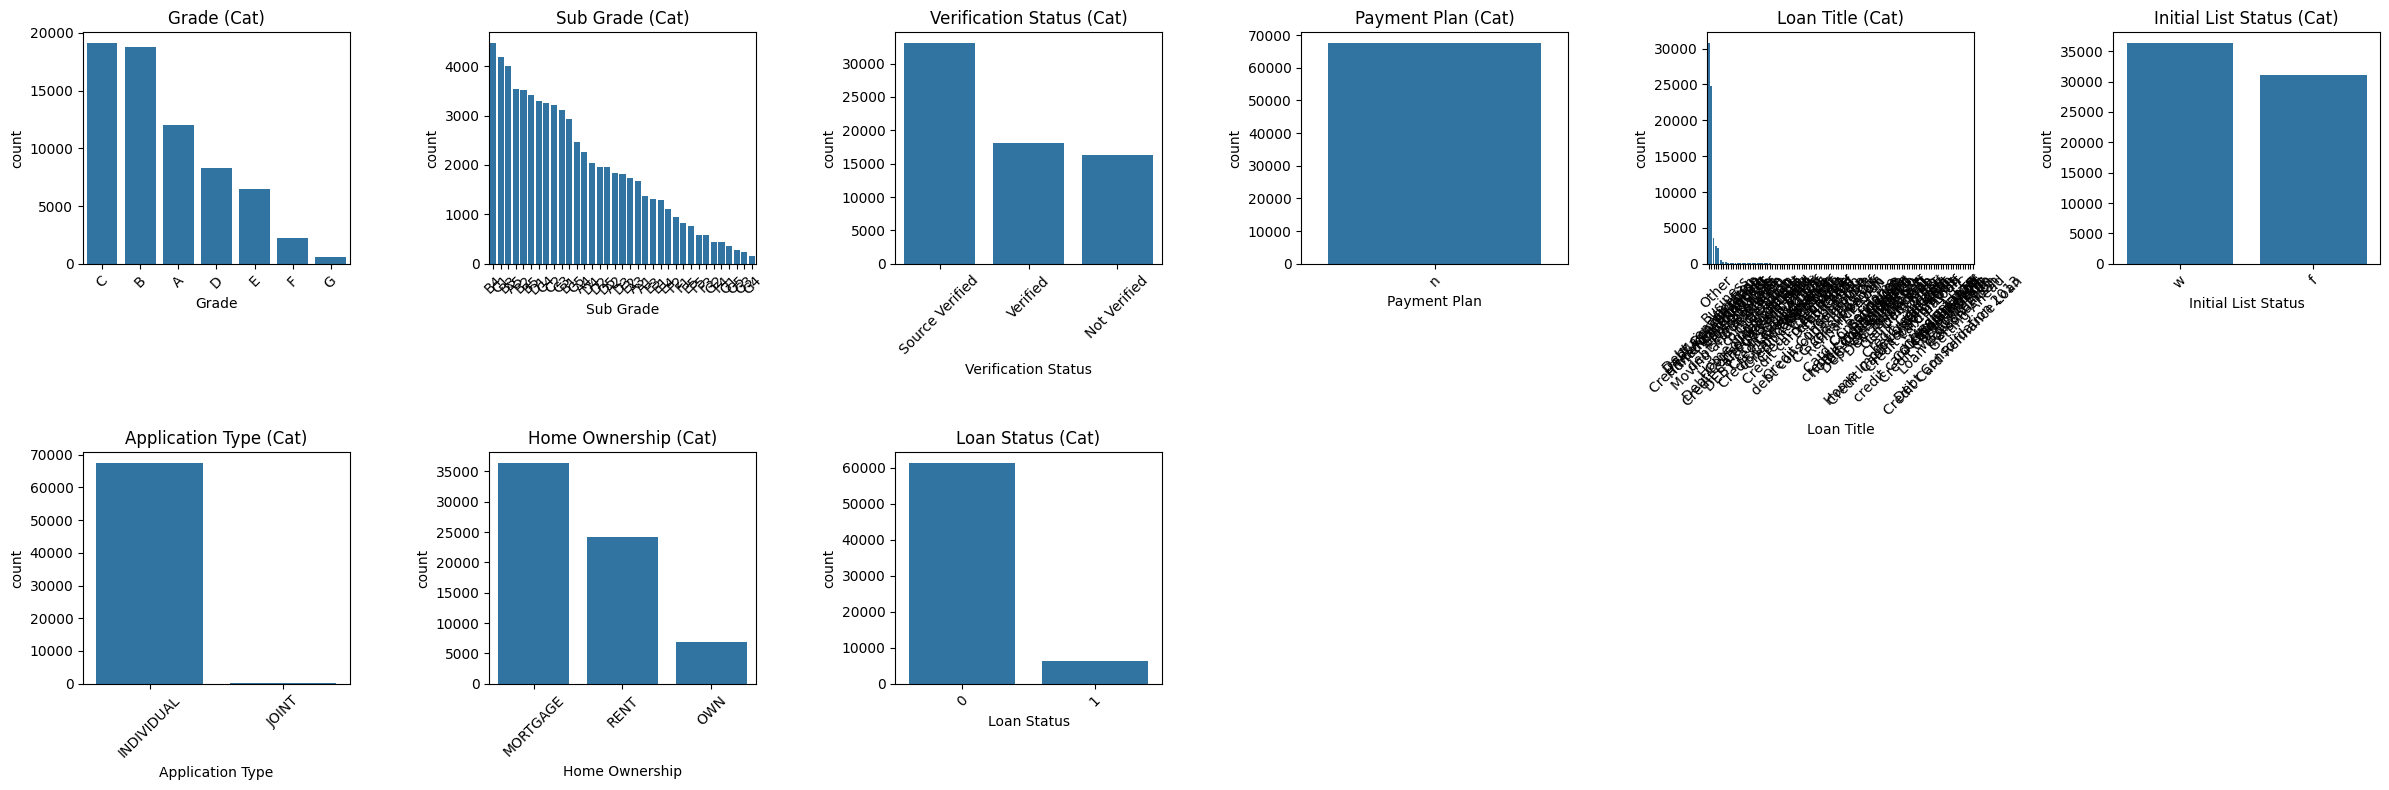

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate feature types
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remove ID if present
numerical_cols = [col for col in numerical_cols if col != 'ID']

# Plot numerical features
n = len(numerical_cols)
rows_num = (n + 5) // 6
fig, axes = plt.subplots(nrows=rows_num, ncols=6, figsize=(24, 4 * rows_num))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"{col} (Num)")

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# Plot categorical features
n = len(categorical_cols)
rows_cat = (n + 5) // 6
fig, axes = plt.subplots(nrows=rows_cat, ncols=6, figsize=(24, 4 * rows_cat))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, x=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"{col} (Cat)")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


## Summary Statistics for Numerical and Categorical Features

Generate descriptive summaries for all features. For numerical columns, include range and distribution statistics. For categorical columns, report unique count and frequency of the most common values.


In [9]:
# Drop 'ID' if present
df_summary = df.drop(columns=['ID']) if 'ID' in df.columns else df.copy()

# Numerical feature summary
numerical_summary = df_summary.select_dtypes(include='number').describe().T
numerical_summary['skew'] = df_summary[numerical_summary.index].skew()
numerical_summary['missing'] = df_summary[numerical_summary.index].isnull().sum()
numerical_summary = numerical_summary[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'skew', 'missing']]
numerical_summary = numerical_summary.round(2)

# Categorical feature summary
categorical_summary = pd.DataFrame({
    'unique': df_summary.select_dtypes(include='object').nunique(),
    'top': df_summary.select_dtypes(include='object').mode().iloc[0],
    'top_freq': df_summary.select_dtypes(include='object').apply(lambda x: x.value_counts().iloc[0]),
    'missing': df_summary.select_dtypes(include='object').isnull().sum()
})

# Display as clean DataFrames
numerical_summary


,count,mean,std,min,25%,50%,75%,max,skew,missing
Loan Amount,67463.0,16848.90,8367.87,1014.00,10012.00,16073.00,22106.00,35000.00,0.29,0
Funded Amount,67463.0,15770.60,8150.99,1014.00,9266.50,13042.00,21793.00,34999.00,0.67,0
Funded Amount Investor,67463.0,14621.80,6785.35,1114.59,9831.68,12793.68,17807.59,34999.75,0.99,0
Term,67463.0,58.17,3.33,36.00,58.00,59.00,59.00,59.00,-6.38,0
Interest Rate,67463.0,11.85,3.72,5.32,9.30,11.38,14.19,27.18,0.56,0
Debit to Income,67463.0,23.30,8.45,0.68,16.76,22.66,30.05,39.63,0.08,0
Delinquency - two years,67463.0,0.33,0.80,0.00,0.00,0.00,0.00,8.00,4.64,0
Inquires - six months,67463.0,0.15,0.47,0.00,0.00,0.00,0.00,5.00,3.71,0
Open Account,67463.0,14.27,6.23,2.00,10.00,13.00,16.00,37.00,1.47,0
Public Record,67463.0,0.08,0.35,0.00,0.00,0.00,0.00,4.00,6.24,0


In [10]:
categorical_summary

,unique,top,top_freq,missing
Grade,7,C,19085,0
Sub Grade,35,B4,4462,0
Verification Status,3,Source Verified,33036,0
Payment Plan,1,n,67463,0
Loan Title,109,Credit card refinancing,30728,0
Initial List Status,2,w,36299,0
Application Type,2,INDIVIDUAL,67340,0
Home Ownership,3,MORTGAGE,36351,0
Loan Status,2,0,61222,0


## Step 5: Feature Engineering and Transformation

Prepare the dataset for machine learning by refining the feature space. This includes removing irrelevant or problematic columns, correcting skewness, and converting categorical variables into a numerical format compatible with machine learning models.

In the context of financial applications—especially credit risk prediction—this step ensures:
- More reliable learning on high-variance data like income, balances, and durations
- Fair treatment of borrower profiles via one-hot encoding
- Prevention of model leakage or instability by removing identifiers and redundant fields

### Drop High-Cardinality and Low-Variance Features

Features such as `Loan Title`, `Payment Plan`, and `Accounts Delinquent` provide minimal predictive value or suffer from extremely high uniqueness. In financial models, such features can lead to overfitting, model instability, and noise—especially when working with regulatory-compliant scoring systems.


In [11]:
features_to_drop = [
    "Loan Title",           # high cardinality (109 unique)
    "Payment Plan",         # only 1 unique value
    "Accounts Delinquent"   # almost entirely zero
]

df = df.drop(columns=features_to_drop)


### Log Transform Highly Skewed Features

Many numeric financial variables such as `Total Current Balance` or `Revolving Balance` are right-skewed. Log transformation compresses large values and expands small ones, stabilizing variance. This is critical for models to detect subtle differences in borrower behavior without being overwhelmed by outliers.


In [12]:
import numpy as np

# List of skewed columns (based on visuals and stats)
log_skewed = [
    'Revolving Balance',
    'Total Current Balance',
    'Total Received Interest',
    'Total Collection Amount',
    'Employment Duration'
]

# Apply log(1 + x) to avoid log(0)
for col in log_skewed:
    df[col] = np.log1p(df[col])


### Encode Categorical Features

Most machine learning models require numerical input. In finance, one-hot encoding preserves interpretability and fairness, ensuring that categorical variables such as `Grade`, `Verification Status`, or `Home Ownership` are translated without ordinal bias.


In [13]:
# Separate features and target
X_raw = df.drop(columns=['Loan Status'])
y = df['Loan Status'].astype(int)

# One-hot encode features safely
X_encoded = pd.get_dummies(X_raw, drop_first=True)
X_encoded.columns = X_encoded.columns.str.replace(" ", "_")

# Ensure alignment before splitting
X_encoded = X_encoded.reset_index(drop=True)
y = y.reset_index(drop=True)

## Step 6: Handle Target Class Imbalance

The target variable `Loan Status` is highly imbalanced, with far more approved or non-default cases than rejected or default cases. In finance, this reflects real-world dynamics where default is rare—but critical to catch.

Training a model on this imbalanced distribution can lead to misleadingly high accuracy, as models may simply learn to predict the majority class. This can be catastrophic in lending decisions, where missing defaults leads to real financial loss.

To mitigate this, we apply SMOTE (Synthetic Minority Over-sampling Technique) to balance the training set. SMOTE generates synthetic samples for the minority class, enabling the model to learn more balanced decision boundaries while leaving the test set untouched for fair evaluation.


### Analyze Class Distribution

Before applying any balancing strategy, review the class proportions in the target variable to confirm the severity of imbalance.


<Axes: title={'center': 'Class Distribution (Loan Status)'}, xlabel='Class', ylabel='Proportion'>

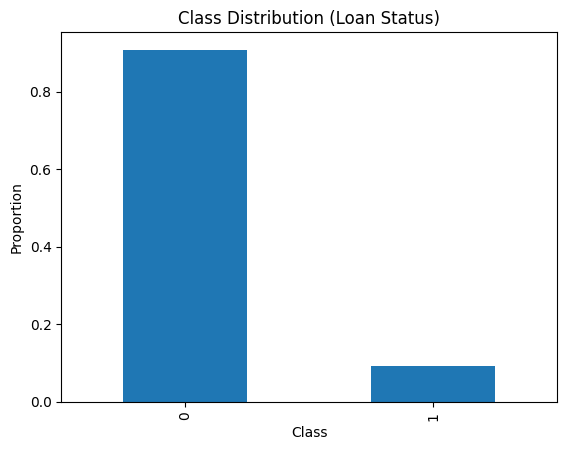

In [14]:
df['Loan Status'].value_counts(normalize=True).plot(
    kind='bar',
    title='Class Distribution (Loan Status)',
    ylabel='Proportion',
    xlabel='Class'
)


### Apply SMOTE for Balancing

SMOTE synthetically creates new samples of the minority class by interpolating between existing samples. It is applied only to the training set to avoid data leakage.


In [15]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, stratify=y, random_state=42
)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_bal_np, y_train_bal = smote.fit_resample(X_train, y_train)

# ✅ Restore column names after SMOTE
X_train_bal = pd.DataFrame(X_train_bal_np, columns=X_train.columns)


## Step 7: Model Selection and Benchmarking

Train and evaluate a targeted set of classification models to identify the most effective algorithms for credit risk prediction. In financial services, especially in lending, selecting the right model is critical to:

- Accurately approve or reject applicants
- Minimize default risk
- Comply with model transparency and fairness regulations (e.g., Basel III, explainability audits)
- Balance predictive power with interpretability for internal risk committees

Rather than testing all available algorithms, we benchmark a curated set of 10 models selected based on:

- Their proven performance in **financial risk modeling**
- Compatibility with **tabular, imbalanced datasets** containing both numerical and categorical features
- Scalability and interpretability, which are key for **real-time decisioning** and **regulatory compliance**

### Selected Models and Financial Rationale:

| Model                         | Finance/Banking Context | Technical Reason |
|------------------------------|-------------------------|------------------|
| LogisticRegression           | Used in traditional credit scoring systems; high interpretability for regulators | Strong baseline; handles high-dimensional, sparse data |
| RandomForestClassifier       | Common in underwriting and fraud detection pipelines | Non-linear, robust to overfitting, handles imbalance |
| ExtraTreesClassifier         | Variant of RF used in large-scale portfolio scoring | Fast, stable under feature noise |
| GradientBoostingClassifier   | Applied in challenger models at fintech lenders | Good at capturing subtle borrower patterns |
| XGBClassifier                | State-of-the-art in many credit default competitions | Excellent performance, handles imbalance natively |
| LGBMClassifier               | Widely used in credit bureaus and scoring vendors | Fast, efficient with categorical and sparse data |
| HistGradientBoostingClassifier | Scales well to bank-sized datasets | Native support for missing values and large-scale tabular data |
| RidgeClassifier              | Useful in internal compliance reporting models | Penalizes complexity; useful with collinear features |
| LinearSVC                    | Margin-maximizing models are used in fraud lines | Good generalization, supports weighted classes |
| KNeighborsClassifier         | Used in exploratory modeling and risk segmentation | Non-parametric; helps benchmark nonlinear structure |

These models represent a blend of **traditional**, **ensemble**, and **boosted** learners, balancing **regulatory transparency**, **model fairness**, and **predictive strength** — all critical in modern financial AI-ML systems.

Performance will be compared using the following evaluation metrics:

- **F1-score**: Prioritizes class balance and is critical when both false positives (approving risky borrowers) and false negatives (rejecting good borrowers) are costly.
- **Precision**: Measures how many approved loans were actually good. High precision reduces false approvals and downstream default risk.
- **Recall**: Indicates how many actual defaulters the model was able to identify. Important for minimizing risk exposure in loan portfolios.
- **ROC-AUC**: Reflects the model’s ability to rank applicants by risk. Useful for score-based systems and threshold tuning.
- **Log Loss**: Penalizes confident but incorrect predictions. Important for models that output risk probabilities, as it informs calibration quality.

These metrics provide a comprehensive, risk-sensitive view of model performance to support lending decisions and regulatory transparency.


In [16]:
from sklearn.metrics import (
    f1_score, precision_score, recall_score,
    roc_auc_score, log_loss
)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils import all_estimators
import pandas as pd
import time

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Assumes: X_train_bal, y_train_bal, X_test, y_test already exist

# Inject external models manually
all_classifiers = {name: model for name, model in all_estimators(type_filter='classifier')}
all_classifiers["XGBClassifier"] = XGBClassifier
all_classifiers["LGBMClassifier"] = LGBMClassifier

# Selected finance-appropriate models
models_to_run = {
    "LogisticRegression": lambda: make_pipeline(
        StandardScaler(), all_classifiers["LogisticRegression"](max_iter=1000)
    ),
    "RandomForestClassifier": lambda: all_classifiers["RandomForestClassifier"](class_weight='balanced'),
    "ExtraTreesClassifier": lambda: all_classifiers["ExtraTreesClassifier"](),
    "GradientBoostingClassifier": lambda: all_classifiers["GradientBoostingClassifier"](),
    "XGBClassifier": lambda: XGBClassifier(eval_metric='logloss', scale_pos_weight=1),
    "LGBMClassifier": lambda: LGBMClassifier(),
    "HistGradientBoostingClassifier": lambda: all_classifiers["HistGradientBoostingClassifier"](),
    "RidgeClassifier": lambda: make_pipeline(StandardScaler(), all_classifiers["RidgeClassifier"]()),
    "LinearSVC": lambda: make_pipeline(StandardScaler(), all_classifiers["LinearSVC"]()),
    "KNeighborsClassifier": lambda: make_pipeline(StandardScaler(), all_classifiers["KNeighborsClassifier"]())
}

results = []

for name, constructor in models_to_run.items():
    print(f"🔄 Running: {name}")
    try:
        model = constructor()
        start = time.time()
        model.fit(X_train_bal, y_train_bal)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

        f1 = f1_score(y_test, y_pred, zero_division=0)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
        logloss = log_loss(y_test, y_proba) if y_proba is not None else None
        elapsed = time.time() - start

        results.append((name, f1, precision, recall, roc_auc, logloss, elapsed))

        print(f"✅ {name} — "
              f"F1: {f1:.4f}, "
              f"Precision: {precision:.4f}, "
              f"Recall: {recall:.4f}, "
              f"ROC-AUC: {roc_auc:.4f}" if roc_auc is not None else "ROC-AUC: N/A" + ", "
              f"LogLoss: {logloss:.4f}" if logloss is not None else "LogLoss: N/A" + ", "
              f"Time: {elapsed:.2f}s\n")

    except Exception as e:
        print(f"❌ {name} failed — {e}\n")

# Format results
results_df = pd.DataFrame(
    results,
    columns=["Model", "F1 Score", "Precision", "Recall", "ROC-AUC", "Log Loss", "Time (s)"]
)

# Round to 4 decimal places
results_df = results_df.round(4)
results_df.sort_values(by="F1 Score", ascending=False)


🔄 Running: LogisticRegression
✅ LogisticRegression — F1: 0.0000, Precision: 0.0000, Recall: 0.0000, ROC-AUC: 0.5197
🔄 Running: RandomForestClassifier
✅ RandomForestClassifier — F1: 0.0424, Precision: 0.1075, Recall: 0.0264, ROC-AUC: 0.5042
🔄 Running: ExtraTreesClassifier
✅ ExtraTreesClassifier — F1: 0.0163, Precision: 0.1078, Recall: 0.0088, ROC-AUC: 0.5062
🔄 Running: GradientBoostingClassifier
✅ GradientBoostingClassifier — F1: 0.0605, Precision: 0.0838, Recall: 0.0473, ROC-AUC: 0.4969
🔄 Running: XGBClassifier
✅ XGBClassifier — F1: 0.0192, Precision: 0.1193, Recall: 0.0104, ROC-AUC: 0.4919
🔄 Running: LGBMClassifier
[LightGBM] [Info] Number of positive: 48977, number of negative: 48977
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010778 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4228
[LightGBM] [Info] Number of data points in th

,Model,F1 Score,Precision,Recall,ROC-AUC,Log Loss,Time (s)
9,KNeighborsClassifier,0.0792,0.1163,0.0601,0.5064,2.1466,3.0563
3,GradientBoostingClassifier,0.0605,0.0838,0.0473,0.4969,0.4521,52.0434
1,RandomForestClassifier,0.0424,0.1075,0.0264,0.5042,0.3906,24.3063
6,HistGradientBoostingClassifier,0.0231,0.1176,0.0128,0.5049,0.3603,2.6789
5,LGBMClassifier,0.0204,0.1102,0.0112,0.5098,0.3596,1.0073
4,XGBClassifier,0.0192,0.1193,0.0104,0.4919,0.3536,0.5875
2,ExtraTreesClassifier,0.0163,0.1078,0.0088,0.5062,0.3524,10.0394
0,LogisticRegression,0.0000,0.0000,0.0000,0.5197,0.3395,0.4972
7,RidgeClassifier,0.0000,0.0000,0.0000,NaN,NaN,0.2562
8,LinearSVC,0.0000,0.0000,0.0000,NaN,NaN,0.6388


## Step 8: Hyperparameter Tuning

In Step 7, we benchmarked a curated set of classification models for credit risk prediction. The evaluation showed that most models performed weakly out-of-the-box, with low F1 scores and poor recall on the minority class. This was expected, as default model parameters are rarely optimal — especially on imbalanced financial datasets.

Despite the low scores, several models showed learning potential. Therefore, we move to Step 8: hyperparameter tuning.

### What Happened in Step 7

- We evaluated 10 models on metrics including F1-score, precision, recall, ROC-AUC, and log loss.
- Three linear models — `LogisticRegression`, `RidgeClassifier`, and `LinearSVC` — consistently failed to identify the positive class (F1 = 0.0), and were excluded from further steps.
- All remaining models produced usable results and demonstrated varying degrees of sensitivity to hyperparameters, suggesting they could improve significantly with tuning.

### What We Will Do in Step 8

We will perform **hyperparameter tuning** on the remaining 7 models using **Optuna**, a powerful optimization framework designed to efficiently search large and complex parameter spaces.

### Models Selected for Tuning

| Model                            | Why Selected |
|----------------------------------|--------------|
| **RandomForestClassifier**       | Stable baseline, interpretable, widely used in credit risk scoring |
| **ExtraTreesClassifier**         | Fast and robust ensemble, good for comparison |
| **GradientBoostingClassifier**   | Best F1 score in Step 7, strong gradient-based learner |
| **XGBClassifier**                | State-of-the-art in many risk and fintech applications |
| **LGBMClassifier**               | Fast and memory-efficient; used in production-grade scoring pipelines |
| **HistGradientBoostingClassifier** | Efficient and scalable with native support for missing values |
| **KNeighborsClassifier**         | Performed better than expected; simple, but sensitive to tuning parameters like `n_neighbors` and `weights` |

### Why Use Optuna?

| Advantage                        | Benefit for This Project |
|----------------------------------|---------------------------|
| **Efficient search**             | Avoids wasteful grid combinations |
| **Bayesian optimization**        | Learns from past trials to propose better ones |
| **Pruning**                      | Stops bad configurations early to save time |
| **Scikit-learn integration**     | Works seamlessly with all selected models |
| **Objective metric control**     | Can maximize F1-score or minimize log loss directly |

This tuning process aims to extract the best possible performance from each model — not by changing the dataset, but by finding the best way each algorithm can learn from it.


In [17]:
import optuna
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

def objective_gb(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    }
    model = GradientBoostingClassifier(**params)
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train_bal, y_train_bal, cv=cv, scoring="f1", n_jobs=-1)
    return score.mean()

study_gb = optuna.create_study(direction="maximize")
study_gb.optimize(objective_gb, n_trials=50, timeout=600)
print("GB Best F1:", study_gb.best_value)
print("GB Best Params:", study_gb.best_params)


[I 2025-06-12 16:52:31,576] A new study created in memory with name: no-name-d9727cf7-9c6e-4666-9664-d08ee1711a46
[I 2025-06-12 16:52:49,705] Trial 0 finished with value: 0.9239462057650597 and parameters: {'n_estimators': 170, 'learning_rate': 0.28449605150426477, 'max_depth': 4, 'min_samples_split': 3, 'min_samples_leaf': 15, 'subsample': 0.7684392461475902, 'max_features': 'log2'}. Best is trial 0 with value: 0.9239462057650597.
[I 2025-06-12 16:53:06,716] Trial 1 finished with value: 0.9276716453750282 and parameters: {'n_estimators': 224, 'learning_rate': 0.18720352545667113, 'max_depth': 5, 'min_samples_split': 4, 'min_samples_leaf': 5, 'subsample': 0.9338305253984793, 'max_features': 'log2'}. Best is trial 1 with value: 0.9276716453750282.
[I 2025-06-12 16:55:05,732] Trial 2 finished with value: 0.9272485788601563 and parameters: {'n_estimators': 214, 'learning_rate': 0.10675528640088763, 'max_depth': 7, 'min_samples_split': 3, 'min_samples_leaf': 1, 'subsample': 0.5628740552606

GB Best F1: 0.9330797970447811
GB Best Params: {'n_estimators': 184, 'learning_rate': 0.11345375302735314, 'max_depth': 10, 'min_samples_split': 18, 'min_samples_leaf': 8, 'subsample': 0.8422130764868899, 'max_features': None}


In [18]:
from sklearn.ensemble import RandomForestClassifier

def objective_rf(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "max_depth": trial.suggest_int("max_depth", 5, 30),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None]),
        "class_weight": "balanced"
    }
    model = RandomForestClassifier(**params)
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train_bal, y_train_bal, cv=cv, scoring="f1", n_jobs=-1)
    return score.mean()

study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(objective_rf, n_trials=50, timeout=600)
print("RF Best F1:", study_rf.best_value)
print("RF Best Params:", study_rf.best_params)


[I 2025-06-12 17:03:06,027] A new study created in memory with name: no-name-169c041c-ac26-4e3d-b507-f8876413acb1
[I 2025-06-12 17:03:45,093] Trial 0 finished with value: 0.8685224657391819 and parameters: {'n_estimators': 208, 'max_depth': 20, 'min_samples_split': 10, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8685224657391819.
[I 2025-06-12 17:04:12,103] Trial 1 finished with value: 0.858529605278412 and parameters: {'n_estimators': 191, 'max_depth': 18, 'min_samples_split': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 0 with value: 0.8685224657391819.
[I 2025-06-12 17:08:20,407] Trial 2 finished with value: 0.838137744329371 and parameters: {'n_estimators': 205, 'max_depth': 19, 'min_samples_split': 7, 'min_samples_leaf': 17, 'max_features': None}. Best is trial 0 with value: 0.8685224657391819.
[I 2025-06-12 17:09:21,242] Trial 3 finished with value: 0.8556753385911916 and parameters: {'n_estimators': 258, 'max_depth': 23, 'm

RF Best F1: 0.9033467775870664
RF Best Params: {'n_estimators': 115, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None}


In [19]:
from sklearn.ensemble import ExtraTreesClassifier

def objective_et(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "max_depth": trial.suggest_int("max_depth", 5, 30),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "max_features": trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    }
    model = ExtraTreesClassifier(**params)
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train_bal, y_train_bal, cv=cv, scoring="f1", n_jobs=-1)
    return score.mean()

study_et = optuna.create_study(direction="maximize")
study_et.optimize(objective_et, n_trials=50, timeout=600)
print("ET Best F1:", study_et.best_value)
print("ET Best Params:", study_et.best_params)


[I 2025-06-12 17:17:48,035] A new study created in memory with name: no-name-659c6b08-ea7b-4e43-b56f-41d32709e03f
[I 2025-06-12 17:18:16,947] Trial 0 finished with value: 0.8642656591095559 and parameters: {'n_estimators': 274, 'max_depth': 27, 'min_samples_split': 16, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 0 with value: 0.8642656591095559.
[I 2025-06-12 17:18:36,853] Trial 1 finished with value: 0.8491979747068436 and parameters: {'n_estimators': 151, 'max_depth': 29, 'min_samples_split': 20, 'min_samples_leaf': 13, 'max_features': 'log2'}. Best is trial 0 with value: 0.8642656591095559.
[I 2025-06-12 17:21:05,879] Trial 2 finished with value: 0.8498112802214545 and parameters: {'n_estimators': 241, 'max_depth': 25, 'min_samples_split': 16, 'min_samples_leaf': 10, 'max_features': None}. Best is trial 0 with value: 0.8642656591095559.
[I 2025-06-12 17:21:12,053] Trial 3 finished with value: 0.8805602818395225 and parameters: {'n_estimators': 59, 'max_depth': 25, 

ET Best F1: 0.9112111835645246
ET Best Params: {'n_estimators': 128, 'max_depth': 30, 'min_samples_split': 12, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


In [20]:
from xgboost import XGBClassifier

def objective_xgb(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "scale_pos_weight": 1,
        "eval_metric": "logloss",
        "use_label_encoder": False
    }
    model = XGBClassifier(**params)
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train_bal, y_train_bal, cv=cv, scoring="f1", n_jobs=-1)
    return score.mean()

study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective_xgb, n_trials=50, timeout=600)
print("XGB Best F1:", study_xgb.best_value)
print("XGB Best Params:", study_xgb.best_params)


[I 2025-06-12 17:28:03,275] A new study created in memory with name: no-name-11427d90-9eed-4330-bf24-c1408ebe5fd1
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:28:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:28:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:28:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-06-12 17:28

XGB Best F1: 0.9393755710357
XGB Best Params: {'n_estimators': 298, 'max_depth': 10, 'learning_rate': 0.22176104629629337, 'subsample': 0.9750463333811327, 'colsample_bytree': 0.6285288004649213}


In [21]:
from lightgbm import LGBMClassifier

def objective_lgb(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0)
    }
    model = LGBMClassifier(**params)
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train_bal, y_train_bal, cv=cv, scoring="f1", n_jobs=-1)
    return score.mean()

study_lgb = optuna.create_study(direction="maximize")
study_lgb.optimize(objective_lgb, n_trials=50, timeout=600)
print("LGBM Best F1:", study_lgb.best_value)
print("LGBM Best Params:", study_lgb.best_params)


[I 2025-06-12 17:32:51,685] A new study created in memory with name: no-name-7e47bec8-d138-4605-b58a-291d66fd10c0


[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013971 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.000031
[LightGBM] [Info] Start training from score 0.000031
[LightGBM] [Info] Number of positive: 32651, number of negative: 32652
[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012664 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in

[I 2025-06-12 17:32:57,048] Trial 0 finished with value: 0.9020429984696668 and parameters: {'n_estimators': 76, 'max_depth': 8, 'learning_rate': 0.11730118578646104, 'subsample': 0.7863940150036318, 'colsample_bytree': 0.5368128094054108}. Best is trial 0 with value: 0.9020429984696668.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.052800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.000031
[LightGBM] [Info] Start training from score 0.000031
[Ligh

[I 2025-06-12 17:33:04,822] Trial 1 finished with value: 0.9343487788180207 and parameters: {'n_estimators': 227, 'max_depth': 7, 'learning_rate': 0.20079626950084944, 'subsample': 0.5414578701242951, 'colsample_bytree': 0.8500413169772874}. Best is trial 1 with value: 0.9343487788180207.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017700 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.0

[I 2025-06-12 17:33:11,273] Trial 2 finished with value: 0.9354247906732817 and parameters: {'n_estimators': 281, 'max_depth': 7, 'learning_rate': 0.21619559261345797, 'subsample': 0.9099323466428297, 'colsample_bytree': 0.9813742273509543}. Best is trial 2 with value: 0.9354247906732817.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2025-06-12 17:33:15,560] Trial 3 finished with value: 0.8263539025891126 and parameters: {'n_estimators': 270, 'max_depth': 4, 'learning_rate': 0.019493883982133337, 'subsample': 0.6784571746494599, 'colsample_bytree': 0.5193544536279953}. Best is trial 2 with value: 0.9354247906732817.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019241 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is 

[I 2025-06-12 17:33:19,620] Trial 4 finished with value: 0.924145199460861 and parameters: {'n_estimators': 104, 'max_depth': 8, 'learning_rate': 0.15061226818638992, 'subsample': 0.576800128601672, 'colsample_bytree': 0.9318865441271675}. Best is trial 2 with value: 0.9354247906732817.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017879 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2025-06-12 17:33:21,380] Trial 5 finished with value: 0.8658407990258886 and parameters: {'n_estimators': 207, 'max_depth': 3, 'learning_rate': 0.0670464168396816, 'subsample': 0.9694682286088075, 'colsample_bytree': 0.8908850009781499}. Best is trial 2 with value: 0.9354247906732817.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016471 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

[I 2025-06-12 17:33:23,313] Trial 6 finished with value: 0.8168505192752757 and parameters: {'n_estimators': 122, 'max_depth': 4, 'learning_rate': 0.03501687400355499, 'subsample': 0.9064714861395948, 'colsample_bytree': 0.9033916912015711}. Best is trial 2 with value: 0.9354247906732817.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, nu

[I 2025-06-12 17:33:25,227] Trial 7 finished with value: 0.8794348116410357 and parameters: {'n_estimators': 75, 'max_depth': 6, 'learning_rate': 0.09977791789271434, 'subsample': 0.5472900265238336, 'colsample_bytree': 0.740804402826582}. Best is trial 2 with value: 0.9354247906732817.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012516 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 6

[I 2025-06-12 17:33:26,901] Trial 8 finished with value: 0.9114321918202775 and parameters: {'n_estimators': 68, 'max_depth': 5, 'learning_rate': 0.24362373658139233, 'subsample': 0.5033061475016161, 'colsample_bytree': 0.5635539422566498}. Best is trial 2 with value: 0.9354247906732817.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Warning] No further splits with positiv

[I 2025-06-12 17:33:28,603] Trial 9 finished with value: 0.907298318880664 and parameters: {'n_estimators': 95, 'max_depth': 4, 'learning_rate': 0.20311965625930717, 'subsample': 0.5249906406847866, 'colsample_bytree': 0.5582995457323383}. Best is trial 2 with value: 0.9354247906732817.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-06-12 17:33:34,721] Trial 10 finished with value: 0.9350027818961774 and parameters: {'n_estimators': 296, 'max_depth': 10, 'learning_rate': 0.2954931046821633, 'subsample': 0.8317222315152135, 'colsample_bytree': 0.7437405068236501}. Best is trial 2 with value: 0.9354247906732817.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032045 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023309 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.0

[I 2025-06-12 17:33:40,589] Trial 11 finished with value: 0.9355352651846375 and parameters: {'n_estimators': 284, 'max_depth': 10, 'learning_rate': 0.2664352541987169, 'subsample': 0.8427374247277991, 'colsample_bytree': 0.7245293043894097}. Best is trial 11 with value: 0.9355352651846375.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016227 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.035949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.0

[I 2025-06-12 17:33:45,923] Trial 12 finished with value: 0.9349221202704966 and parameters: {'n_estimators': 245, 'max_depth': 10, 'learning_rate': 0.2997119126098043, 'subsample': 0.8733696696449404, 'colsample_bytree': 0.9938649729529634}. Best is trial 11 with value: 0.9355352651846375.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024259 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.0

[I 2025-06-12 17:33:49,776] Trial 13 finished with value: 0.9338765532299349 and parameters: {'n_estimators': 164, 'max_depth': 9, 'learning_rate': 0.24645817674334763, 'subsample': 0.9997476187246231, 'colsample_bytree': 0.6478220469552689}. Best is trial 11 with value: 0.9355352651846375.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035821 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.000031
[LightGBM] [Info] Start training from score 0.000031
[Ligh

[I 2025-06-12 17:33:56,019] Trial 14 finished with value: 0.9352148241098762 and parameters: {'n_estimators': 296, 'max_depth': 7, 'learning_rate': 0.23079507483384623, 'subsample': 0.707957586401284, 'colsample_bytree': 0.8064451344627728}. Best is trial 11 with value: 0.9355352651846375.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026787 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022660 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.000031
[LightGBM] [Info] Start training from score 0.000031
[Ligh

[I 2025-06-12 17:34:00,755] Trial 15 finished with value: 0.9332853221328672 and parameters: {'n_estimators': 179, 'max_depth': 9, 'learning_rate': 0.1794958036142319, 'subsample': 0.9296337978918494, 'colsample_bytree': 0.6581729805241536}. Best is trial 11 with value: 0.9355352651846375.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013360 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013969 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.0

[I 2025-06-12 17:34:05,735] Trial 16 finished with value: 0.9343903870141229 and parameters: {'n_estimators': 260, 'max_depth': 6, 'learning_rate': 0.2646496783772635, 'subsample': 0.7954585124158723, 'colsample_bytree': 0.6904845477940911}. Best is trial 11 with value: 0.9355352651846375.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024835 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.000031
[LightGBM] [Info] Start training from score 0.000031
[Ligh

[I 2025-06-12 17:34:10,423] Trial 17 finished with value: 0.933483376966031 and parameters: {'n_estimators': 206, 'max_depth': 8, 'learning_rate': 0.15739606442018184, 'subsample': 0.8575405111330496, 'colsample_bytree': 0.8156885093996296}. Best is trial 11 with value: 0.9355352651846375.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.0

[I 2025-06-12 17:34:16,317] Trial 18 finished with value: 0.9346395229631668 and parameters: {'n_estimators': 271, 'max_depth': 9, 'learning_rate': 0.2713834945418089, 'subsample': 0.7252308109872689, 'colsample_bytree': 0.6837740630430601}. Best is trial 11 with value: 0.9355352651846375.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020611 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.0

[I 2025-06-12 17:34:20,377] Trial 19 finished with value: 0.9341733617550755 and parameters: {'n_estimators': 164, 'max_depth': 10, 'learning_rate': 0.21181822029240593, 'subsample': 0.9308975788227933, 'colsample_bytree': 0.9925589067483032}. Best is trial 11 with value: 0.9355352651846375.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028791 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.026960 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> in

[I 2025-06-12 17:34:24,698] Trial 20 finished with value: 0.9312766274194576 and parameters: {'n_estimators': 233, 'max_depth': 5, 'learning_rate': 0.1689699406800684, 'subsample': 0.6371225159353686, 'colsample_bytree': 0.6178915323166949}. Best is trial 11 with value: 0.9355352651846375.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info

[I 2025-06-12 17:34:30,496] Trial 21 finished with value: 0.9349496392843782 and parameters: {'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.22951477279326252, 'subsample': 0.736940987317408, 'colsample_bytree': 0.78829250060166}. Best is trial 11 with value: 0.9355352651846375.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024543 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017648 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.0

[I 2025-06-12 17:34:36,053] Trial 22 finished with value: 0.9342951346750706 and parameters: {'n_estimators': 281, 'max_depth': 7, 'learning_rate': 0.26549115448783506, 'subsample': 0.6768356343441119, 'colsample_bytree': 0.7916958748767996}. Best is trial 11 with value: 0.9355352651846375.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.000031
[LightGBM] [Info] Start training from score 0.000031
[Ligh

[I 2025-06-12 17:34:41,446] Trial 23 finished with value: 0.9341091477144238 and parameters: {'n_estimators': 249, 'max_depth': 6, 'learning_rate': 0.2207543127137937, 'subsample': 0.7961365285135015, 'colsample_bytree': 0.8515513381772661}. Best is trial 11 with value: 0.9355352651846375.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021811 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020844 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.0

[I 2025-06-12 17:34:47,369] Trial 24 finished with value: 0.9355236557602223 and parameters: {'n_estimators': 285, 'max_depth': 8, 'learning_rate': 0.19037576095585915, 'subsample': 0.8433111631088271, 'colsample_bytree': 0.9417884675370228}. Best is trial 11 with value: 0.9355352651846375.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017799 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.0

[I 2025-06-12 17:34:53,547] Trial 25 finished with value: 0.9344240805515341 and parameters: {'n_estimators': 280, 'max_depth': 9, 'learning_rate': 0.13050677935784893, 'subsample': 0.8780400010764968, 'colsample_bytree': 0.9531819527090005}. Best is trial 11 with value: 0.9355352651846375.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015790 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036388 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.0

[I 2025-06-12 17:34:58,226] Trial 26 finished with value: 0.9343895105088613 and parameters: {'n_estimators': 219, 'max_depth': 8, 'learning_rate': 0.19094945219614598, 'subsample': 0.8260008695973449, 'colsample_bytree': 0.951960012453374}. Best is trial 11 with value: 0.9355352651846375.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.036137 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.0

[I 2025-06-12 17:35:03,551] Trial 27 finished with value: 0.9344332202768085 and parameters: {'n_estimators': 254, 'max_depth': 8, 'learning_rate': 0.27576859073613846, 'subsample': 0.9034150455150053, 'colsample_bytree': 0.8756877587265113}. Best is trial 11 with value: 0.9355352651846375.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Number of positive: 32651, number of negative: 32652
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[L

[I 2025-06-12 17:35:08,056] Trial 28 finished with value: 0.9348193532107624 and parameters: {'n_estimators': 190, 'max_depth': 10, 'learning_rate': 0.24492482852624423, 'subsample': 0.9560537923497754, 'colsample_bytree': 0.9251829248308254}. Best is trial 11 with value: 0.9355352651846375.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030205 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018493 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.0

[I 2025-06-12 17:35:14,205] Trial 29 finished with value: 0.9328427377350157 and parameters: {'n_estimators': 280, 'max_depth': 8, 'learning_rate': 0.10843659692551014, 'subsample': 0.7718703889530918, 'colsample_bytree': 0.7045820570206159}. Best is trial 11 with value: 0.9355352651846375.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.0

[I 2025-06-12 17:35:17,742] Trial 30 finished with value: 0.9292367422863476 and parameters: {'n_estimators': 140, 'max_depth': 9, 'learning_rate': 0.13738603239435612, 'subsample': 0.8511493211711114, 'colsample_bytree': 0.9752138692032557}. Best is trial 11 with value: 0.9355352651846375.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014741 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.0

[I 2025-06-12 17:35:23,876] Trial 31 finished with value: 0.9346758180584293 and parameters: {'n_estimators': 299, 'max_depth': 7, 'learning_rate': 0.22695196824116132, 'subsample': 0.7224940185976607, 'colsample_bytree': 0.7795937489439047}. Best is trial 11 with value: 0.9355352651846375.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023027 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020877 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.0

[I 2025-06-12 17:35:29,822] Trial 32 finished with value: 0.9348943944858519 and parameters: {'n_estimators': 284, 'max_depth': 7, 'learning_rate': 0.17521753605794965, 'subsample': 0.7722022094365604, 'colsample_bytree': 0.8546889186181521}. Best is trial 11 with value: 0.9355352651846375.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028010 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.0

[I 2025-06-12 17:35:31,442] Trial 33 finished with value: 0.8931402265212068 and parameters: {'n_estimators': 50, 'max_depth': 6, 'learning_rate': 0.18856287211935321, 'subsample': 0.6862027139053994, 'colsample_bytree': 0.8226548028044871}. Best is trial 11 with value: 0.9355352651846375.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.0

[I 2025-06-12 17:35:36,416] Trial 34 finished with value: 0.933720964223812 and parameters: {'n_estimators': 237, 'max_depth': 7, 'learning_rate': 0.2062853798958688, 'subsample': 0.6303567360136445, 'colsample_bytree': 0.9172429426767443}. Best is trial 11 with value: 0.9355352651846375.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.030572 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> in

[I 2025-06-12 17:35:41,328] Trial 35 finished with value: 0.932909727761733 and parameters: {'n_estimators': 264, 'max_depth': 5, 'learning_rate': 0.24048796927801658, 'subsample': 0.8166511068109886, 'colsample_bytree': 0.733432352894566}. Best is trial 11 with value: 0.9355352651846375.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.049686 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.000031
[LightGBM] [Info] Start training from score 0.000031
[Ligh

[I 2025-06-12 17:35:47,624] Trial 36 finished with value: 0.9348800505706457 and parameters: {'n_estimators': 266, 'max_depth': 8, 'learning_rate': 0.2189347274044703, 'subsample': 0.8956739225158776, 'colsample_bytree': 0.9557315281833125}. Best is trial 11 with value: 0.9355352651846375.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020810 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.0

[I 2025-06-12 17:35:52,394] Trial 37 finished with value: 0.9344157182784899 and parameters: {'n_estimators': 215, 'max_depth': 7, 'learning_rate': 0.2811924346519454, 'subsample': 0.7642081420174266, 'colsample_bytree': 0.7719468671733137}. Best is trial 11 with value: 0.9355352651846375.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038527 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.022076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.0

[I 2025-06-12 17:35:58,140] Trial 38 finished with value: 0.9346757470144529 and parameters: {'n_estimators': 289, 'max_depth': 6, 'learning_rate': 0.25705691011199006, 'subsample': 0.9306911216811601, 'colsample_bytree': 0.8833894815865769}. Best is trial 11 with value: 0.9355352651846375.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019138 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023994 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.0

[I 2025-06-12 17:36:05,043] Trial 39 finished with value: 0.9353659828367227 and parameters: {'n_estimators': 274, 'max_depth': 9, 'learning_rate': 0.1923174233473471, 'subsample': 0.6954302260388666, 'colsample_bytree': 0.6098929099791477}. Best is trial 11 with value: 0.9355352651846375.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.0

[I 2025-06-12 17:36:12,993] Trial 40 finished with value: 0.9345738976801847 and parameters: {'n_estimators': 271, 'max_depth': 9, 'learning_rate': 0.15598054379279996, 'subsample': 0.6320578561532721, 'colsample_bytree': 0.5023149092912624}. Best is trial 11 with value: 0.9355352651846375.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.045164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.0

[I 2025-06-12 17:36:20,590] Trial 41 finished with value: 0.9357346455001556 and parameters: {'n_estimators': 291, 'max_depth': 8, 'learning_rate': 0.19616759523618993, 'subsample': 0.7094901005278179, 'colsample_bytree': 0.5983664420103866}. Best is trial 41 with value: 0.9357346455001556.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.0

[I 2025-06-12 17:36:27,089] Trial 42 finished with value: 0.9352273588137062 and parameters: {'n_estimators': 247, 'max_depth': 10, 'learning_rate': 0.1948013376730523, 'subsample': 0.6565659346302091, 'colsample_bytree': 0.5891577106323745}. Best is trial 41 with value: 0.9357346455001556.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014532 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.0

[I 2025-06-12 17:36:34,721] Trial 43 finished with value: 0.935049644058448 and parameters: {'n_estimators': 275, 'max_depth': 9, 'learning_rate': 0.17160864431791104, 'subsample': 0.5968847734829077, 'colsample_bytree': 0.5405692106203294}. Best is trial 41 with value: 0.9357346455001556.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.016365 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023707 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.0

[I 2025-06-12 17:36:42,386] Trial 44 finished with value: 0.9315528020604136 and parameters: {'n_estimators': 288, 'max_depth': 8, 'learning_rate': 0.08814392848400973, 'subsample': 0.7035418408957023, 'colsample_bytree': 0.5779208897051227}. Best is trial 41 with value: 0.9357346455001556.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.034865 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038710 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.0

[I 2025-06-12 17:36:49,147] Trial 45 finished with value: 0.9346169834137141 and parameters: {'n_estimators': 259, 'max_depth': 10, 'learning_rate': 0.14417504509394077, 'subsample': 0.7522857700434429, 'colsample_bytree': 0.611074626316505}. Best is trial 41 with value: 0.9357346455001556.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.041935 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.031567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.000031
[LightGBM] [Info] Start training from score 0.000031
[Ligh

[I 2025-06-12 17:36:55,608] Trial 46 finished with value: 0.9351924978185359 and parameters: {'n_estimators': 232, 'max_depth': 9, 'learning_rate': 0.20290931815954852, 'subsample': 0.985887130954008, 'colsample_bytree': 0.6183959625077773}. Best is trial 41 with value: 0.9357346455001556.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019950 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.038070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.000031
[LightGBM] [Info] Start training from score 0.000031
[Ligh

[I 2025-06-12 17:37:03,756] Trial 47 finished with value: 0.9349157329846888 and parameters: {'n_estimators': 290, 'max_depth': 8, 'learning_rate': 0.16054000712657815, 'subsample': 0.844183434132082, 'colsample_bytree': 0.6538147106604263}. Best is trial 41 with value: 0.9357346455001556.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.021970 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

[I 2025-06-12 17:37:07,588] Trial 48 finished with value: 0.852583523469476 and parameters: {'n_estimators': 260, 'max_depth': 3, 'learning_rate': 0.04387089024944443, 'subsample': 0.8072146905314918, 'colsample_bytree': 0.5350264792771591}. Best is trial 41 with value: 0.9357346455001556.


[LightGBM] [Info] Number of positive: 32651, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018999 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4227
[LightGBM] [Info] Number of data points in the train set: 65302, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 32652, number of negative: 32651
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017795 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4225
[LightGBM] [Info] Number of data points in the train set: 65303, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500008 -> initscore=0.0

[I 2025-06-12 17:37:14,410] Trial 49 finished with value: 0.9350412295419611 and parameters: {'n_estimators': 274, 'max_depth': 8, 'learning_rate': 0.18815965421659653, 'subsample': 0.8763075406705864, 'colsample_bytree': 0.6387380906098314}. Best is trial 41 with value: 0.9357346455001556.


LGBM Best F1: 0.9357346455001556
LGBM Best Params: {'n_estimators': 291, 'max_depth': 8, 'learning_rate': 0.19616759523618993, 'subsample': 0.7094901005278179, 'colsample_bytree': 0.5983664420103866}


In [22]:
from sklearn.ensemble import HistGradientBoostingClassifier

def objective_hist(trial):
    params = {
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_iter": trial.suggest_int("max_iter", 50, 300),
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 20, 100),
        "l2_regularization": trial.suggest_float("l2_regularization", 0.0, 1.0)
    }
    model = HistGradientBoostingClassifier(**params)
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train_bal, y_train_bal, cv=cv, scoring="f1", n_jobs=-1)
    return score.mean()

study_hist = optuna.create_study(direction="maximize")
study_hist.optimize(objective_hist, n_trials=50, timeout=600)
print("HistGB Best F1:", study_hist.best_value)
print("HistGB Best Params:", study_hist.best_params)


[I 2025-06-12 17:37:14,501] A new study created in memory with name: no-name-bf2848ea-65fb-4022-ade6-80ab4dfbbd1c
[I 2025-06-12 17:37:20,265] Trial 0 finished with value: 0.8992091704191857 and parameters: {'learning_rate': 0.10713682199601665, 'max_iter': 101, 'max_depth': 6, 'min_samples_leaf': 24, 'l2_regularization': 0.9954379663802834}. Best is trial 0 with value: 0.8992091704191857.
[I 2025-06-12 17:37:31,806] Trial 1 finished with value: 0.9314956333045729 and parameters: {'learning_rate': 0.12714218602800836, 'max_iter': 220, 'max_depth': 8, 'min_samples_leaf': 74, 'l2_regularization': 0.684541471107672}. Best is trial 1 with value: 0.9314956333045729.
[I 2025-06-12 17:37:42,100] Trial 2 finished with value: 0.9129589101171361 and parameters: {'learning_rate': 0.08807019609472297, 'max_iter': 262, 'max_depth': 4, 'min_samples_leaf': 88, 'l2_regularization': 0.9303286300641929}. Best is trial 1 with value: 0.9314956333045729.
[I 2025-06-12 17:37:55,934] Trial 3 finished with val

HistGB Best F1: 0.9357878306979104
HistGB Best Params: {'learning_rate': 0.20306339978847998, 'max_iter': 290, 'max_depth': 9, 'min_samples_leaf': 88, 'l2_regularization': 0.5286096626022396}


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def objective_knn(trial):
    params = {
        "n_neighbors": trial.suggest_int("n_neighbors", 3, 25),
        "weights": trial.suggest_categorical("weights", ["uniform", "distance"]),
        "metric": trial.suggest_categorical("metric", ["euclidean", "manhattan", "minkowski"])
    }
    model = make_pipeline(StandardScaler(), KNeighborsClassifier(**params))
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train_bal, y_train_bal, cv=cv, scoring="f1", n_jobs=-1)
    return score.mean()

study_knn = optuna.create_study(direction="maximize")
study_knn.optimize(objective_knn, n_trials=50, timeout=600)
print("KNN Best F1:", study_knn.best_value)
print("KNN Best Params:", study_knn.best_params)


[I 2025-06-12 17:45:16,772] A new study created in memory with name: no-name-ea28f53e-ed7e-47b6-b497-4ee30b1f4730
[I 2025-06-12 17:47:14,547] Trial 0 finished with value: 0.936464643897165 and parameters: {'n_neighbors': 25, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 0 with value: 0.936464643897165.
[I 2025-06-12 17:47:26,862] Trial 1 finished with value: 0.8871917032190874 and parameters: {'n_neighbors': 21, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 0 with value: 0.936464643897165.
[I 2025-06-12 17:49:13,354] Trial 2 finished with value: 0.9540513957388512 and parameters: {'n_neighbors': 3, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 2 with value: 0.9540513957388512.
[I 2025-06-12 17:50:59,860] Trial 3 finished with value: 0.9043057777884987 and parameters: {'n_neighbors': 21, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 2 with value: 0.9540513957388512.
[I 2025-06-12 17:51:11,952] Trial 4 finished with value: 0.934991

KNN Best F1: 0.9540513957388512
KNN Best Params: {'n_neighbors': 3, 'weights': 'uniform', 'metric': 'manhattan'}


### Summary of Tuned Models

After running hyperparameter tuning with Optuna on all selected models in Step 8, we compile and compare their best results. Each model was evaluated using 3-fold cross-validation on the SMOTE-balanced training set, with **F1 score** as the objective metric.

This summary provides:

- The **best F1 score** achieved for each model
- The **corresponding hyperparameter configuration**
- A quick reference for identifying top candidates for final retraining and evaluation

We intentionally retain all models — including those that may not top the F1 ranking — to preserve flexibility in downstream comparison, interpretation, or potential ensemble strategies.

This full-model approach reflects a realistic credit scoring pipeline, where even second-tier models can offer complementary value in risk segmentation or model governance.


In [24]:
import pandas as pd

# Define a mapping of model name to its Optuna study object
studies = {
    "GradientBoosting": study_gb,
    "RandomForest": study_rf,
    "ExtraTrees": study_et,
    "XGBoost": study_xgb,
    "LightGBM": study_lgb,
    "HistGradientBoosting": study_hist,
    "KNeighbors": study_knn
}

# Collect results into a list of rows
summary_data = []
for model_name, study in studies.items():
    summary_data.append({
        "Model": model_name,
        "Best F1 Score": round(study.best_value, 4),
        "Best Parameters": study.best_params
    })

# Display as DataFrame
summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values(by="Best F1 Score", ascending=False).reset_index(drop=True)

summary_df


,Model,Best F1 Score,Best Parameters
0,KNeighbors,0.9541,"{'n_neighbors': 3, 'weights': 'uniform', 'metr..."
1,XGBoost,0.9394,"{'n_estimators': 298, 'max_depth': 10, 'learni..."
2,HistGradientBoosting,0.9358,"{'learning_rate': 0.20306339978847998, 'max_it..."
3,LightGBM,0.9357,"{'n_estimators': 291, 'max_depth': 8, 'learnin..."
4,GradientBoosting,0.9331,"{'n_estimators': 184, 'learning_rate': 0.11345..."
5,ExtraTrees,0.9112,"{'n_estimators': 128, 'max_depth': 30, 'min_sa..."
6,RandomForest,0.9033,"{'n_estimators': 115, 'max_depth': 30, 'min_sa..."


## Step 9: Final Evaluation on Holdout Test Set

In Step 8, we performed hyperparameter tuning using Optuna on all selected models (excluding the three excluded linear models). Each model was optimized for F1 score using 3-fold cross-validation on the SMOTE-balanced training data. The results showed that tuning significantly improved the F1 scores across models, with several achieving values above 0.90 on the training folds.

In this step, we retrain each tuned model on the entire balanced training set using its best parameters from Step 8, then evaluate its performance on the **original, imbalanced test set**.

### Why This Step Is Important

- The test set represents real-world class imbalance and unseen applicants — so it reveals true generalization.
- This evaluation helps us compare models under realistic deployment conditions.
- Using consistent evaluation metrics allows us to identify models with the best balance between default detection and approval precision.

### Evaluation Metrics

| Metric       | Purpose in Credit Risk Context                                 |
|--------------|----------------------------------------------------------------|
| **F1 Score** | Measures overall performance on the minority class (defaults)  |
| **Precision**| Reduces false approvals (false positives)                      |
| **Recall**   | Reduces missed defaulters (false negatives)                    |
| **ROC-AUC**  | Measures ability to rank-order risk correctly                  |
| **Log Loss** | Penalizes overconfident wrong predictions (important for PD)   |

The outcome of this step will guide final model selection, inform ensemble decisions, or highlight where threshold tuning or additional refinement is needed.


In [25]:
import time
from sklearn.metrics import (
    f1_score, precision_score, recall_score, roc_auc_score, log_loss
)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import (
    GradientBoostingClassifier, RandomForestClassifier,
    ExtraTreesClassifier, HistGradientBoostingClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Dictionary of tuned model constructors
tuned_models = {
    "GradientBoosting": GradientBoostingClassifier(**study_gb.best_params),
    "RandomForest": RandomForestClassifier(**study_rf.best_params),
    "ExtraTrees": ExtraTreesClassifier(**study_et.best_params),
    "XGBoost": XGBClassifier(**study_xgb.best_params),
    "LightGBM": LGBMClassifier(**study_lgb.best_params),
    "HistGradientBoosting": HistGradientBoostingClassifier(**study_hist.best_params),
    "KNeighbors": make_pipeline(StandardScaler(), KNeighborsClassifier(**study_knn.best_params))
}

# Evaluate each model on the imbalanced test set
eval_results = []

for name, model in tuned_models.items():
    print(f"🔄 Evaluating: {name}")
    start = time.time()
    model.fit(X_train_bal, y_train_bal)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    f1 = f1_score(y_test, y_pred, zero_division=0)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    roc = roc_auc_score(y_test, y_proba) if y_proba is not None else None
    logloss = log_loss(y_test, y_proba) if y_proba is not None else None
    elapsed = time.time() - start

    eval_results.append({
        "Model": name,
        "F1 Score": round(f1, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "ROC-AUC": round(roc, 4) if roc is not None else None,
        "Log Loss": round(logloss, 4) if logloss is not None else None,
        "Time (s)": round(elapsed, 2)
    })

# Display final results
results_df = pd.DataFrame(eval_results).sort_values(by="F1 Score", ascending=False).reset_index(drop=True)
results_df


🔄 Evaluating: GradientBoosting
🔄 Evaluating: RandomForest
🔄 Evaluating: ExtraTrees
🔄 Evaluating: XGBoost
🔄 Evaluating: LightGBM
[LightGBM] [Info] Number of positive: 48977, number of negative: 48977
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4228
[LightGBM] [Info] Number of data points in the train set: 97954, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
🔄 Evaluating: HistGradientBoosting
🔄 Evaluating: KNeighbors


,Model,F1 Score,Precision,Recall,ROC-AUC,Log Loss,Time (s)
0,KNeighbors,0.0827,0.1015,0.0697,0.5056,2.8883,36.20
1,RandomForest,0.0564,0.0952,0.0401,0.5059,0.3891,236.96
2,ExtraTrees,0.0293,0.1135,0.0168,0.5033,0.3683,12.82
3,GradientBoosting,0.0213,0.0926,0.0120,0.5011,0.3515,296.45
4,XGBoost,0.0131,0.0738,0.0072,0.5068,0.3777,4.06
5,HistGradientBoosting,0.0122,0.1194,0.0064,0.5158,0.3385,8.47
6,LightGBM,0.0062,0.0769,0.0032,0.5033,0.3400,3.46


## Step 10: Threshold Tuning for Decision Optimization

After evaluating tuned models in Step 9, we observed that several models had low recall or F1-score despite high-quality training. This is common when using a fixed classification threshold (typically 0.5), especially on imbalanced datasets like loan defaults.

In real-world credit risk systems, decisions are often based on probability cutoffs that reflect **risk tolerance**, **regulatory limits**, or **portfolio strategy** — not a default 0.5.

### Previously in Step 9

- All models were retrained using their best hyperparameters
- Evaluation on the real-world test set showed lower F1 and recall than during training (Step 8), due to class imbalance and threshold rigidity
- Models are producing **well-calibrated probabilities**, but the decision cutoff needs tuning

### What This Step Will Do

In this step, we:
- Extract predicted probabilities from top models
- Evaluate their performance across different thresholds
- Visualize the trade-off between precision and recall
- Identify a **custom threshold** that improves F1-score or recall while maintaining acceptable precision

### Business Rationale

In banking and financial services:
- A **lower threshold** may help capture more risky applicants (higher recall), useful in conservative or compliance-driven contexts
- A **higher threshold** may reduce false approvals (higher precision), preferred when minimizing default exposure
- Threshold tuning allows **executives, risk managers, or compliance teams** to align model behavior with institutional policy and risk appetite

This makes the model not just accurate, but **actionable and controllable** — key for operational deployment in loan systems.


🔍 Threshold tuning for: GradientBoosting


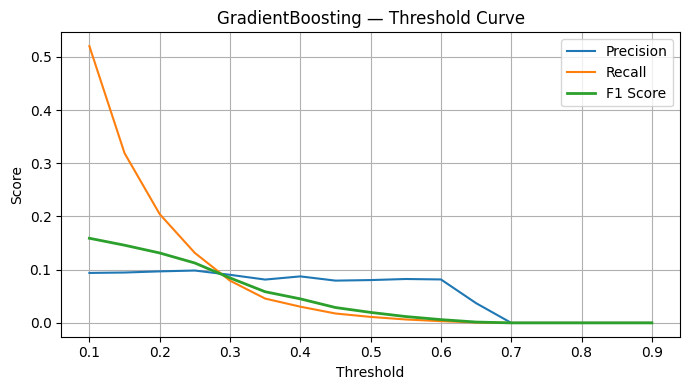

🔍 Threshold tuning for: RandomForest


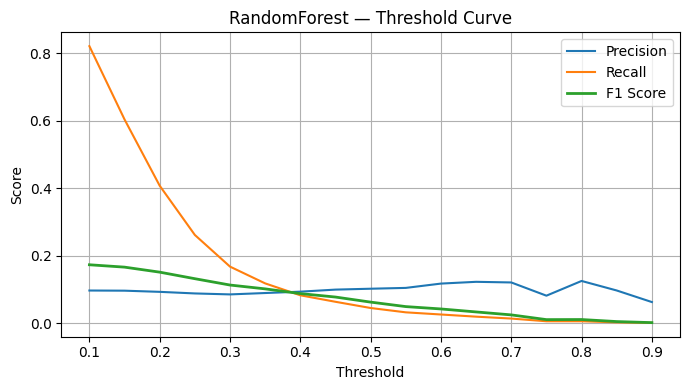

🔍 Threshold tuning for: ExtraTrees


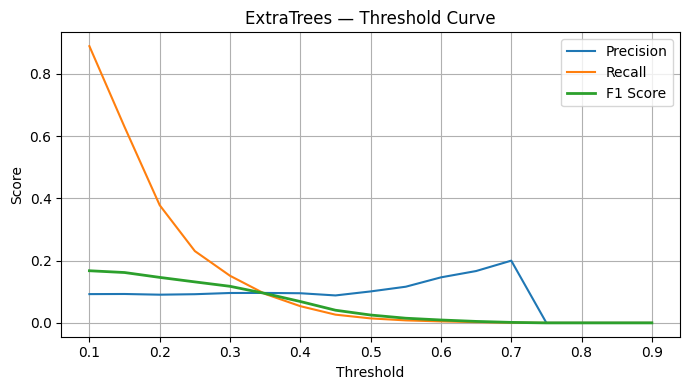

🔍 Threshold tuning for: XGBoost


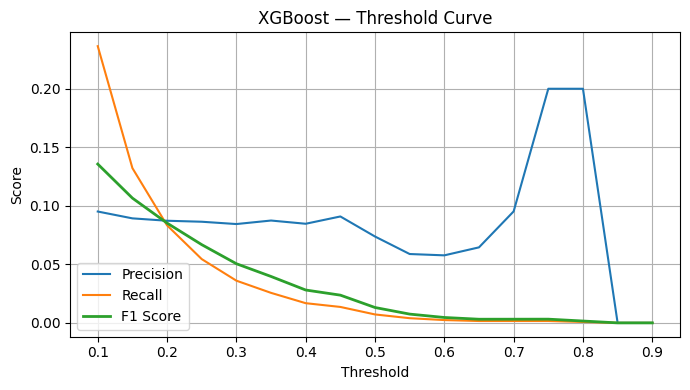

🔍 Threshold tuning for: LightGBM
[LightGBM] [Info] Number of positive: 48977, number of negative: 48977
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4228
[LightGBM] [Info] Number of data points in the train set: 97954, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


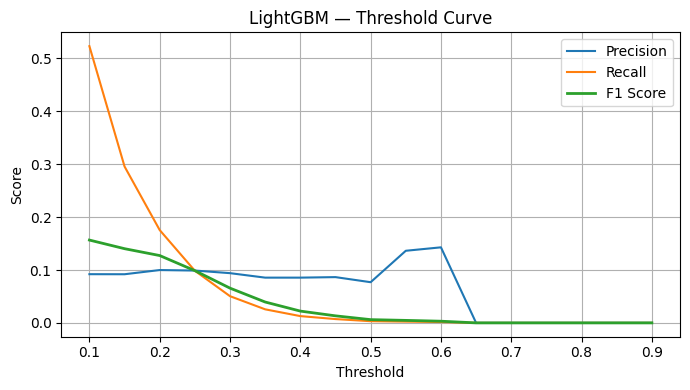

🔍 Threshold tuning for: HistGradientBoosting


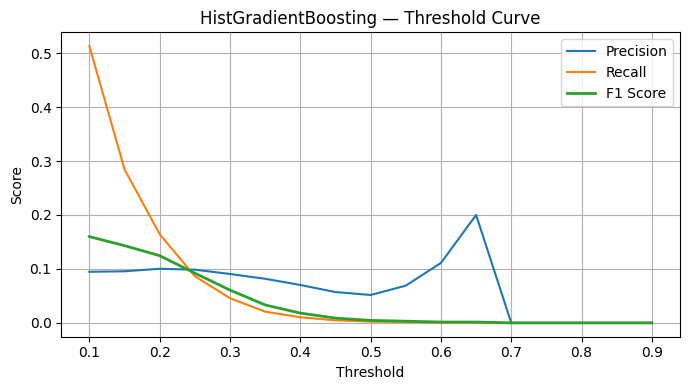

🔍 Threshold tuning for: KNeighbors


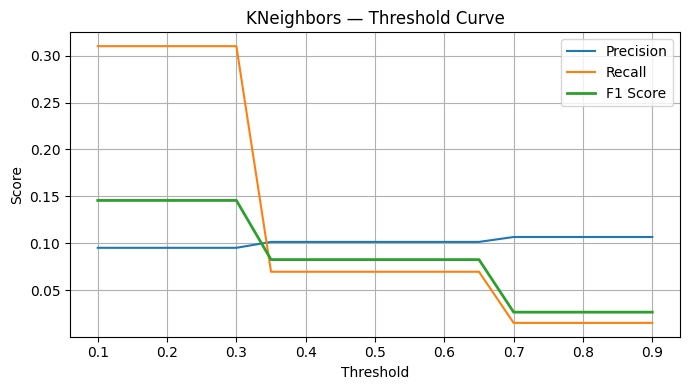

,Model,Best Threshold,F1,Precision,Recall
0,RandomForest,0.1,0.1730,0.0967,0.8205
1,ExtraTrees,0.1,0.1676,0.0925,0.8894
2,HistGradientBoosting,0.1,0.1598,0.0947,0.5128
3,GradientBoosting,0.1,0.1590,0.0939,0.5200
4,LightGBM,0.1,0.1566,0.0921,0.5232
5,KNeighbors,0.1,0.1457,0.0952,0.3101
6,XGBoost,0.1,0.1357,0.0951,0.2364


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Store tuning results for all models
threshold_results = {}

# Threshold range
thresholds = np.arange(0.1, 0.91, 0.05)

for name, model in tuned_models.items():
    if not hasattr(model, "predict_proba"):
        print(f"⚠️ Skipping {name} (no predict_proba support)")
        continue

    print(f"🔍 Threshold tuning for: {name}")
    model.fit(X_train_bal, y_train_bal)
    y_proba = model.predict_proba(X_test)[:, 1]

    scores = []
    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        scores.append((t, precision, recall, f1))

    # Convert to DataFrame
    df = pd.DataFrame(scores, columns=["Threshold", "Precision", "Recall", "F1"])
    best_row = df.loc[df["F1"].idxmax()]
    threshold_results[name] = {
        "Best Threshold": round(best_row["Threshold"], 2),
        "F1": round(best_row["F1"], 4),
        "Precision": round(best_row["Precision"], 4),
        "Recall": round(best_row["Recall"], 4),
        "Curve": df
    }

    # Plot curves
    plt.figure(figsize=(7, 4))
    plt.plot(df["Threshold"], df["Precision"], label="Precision")
    plt.plot(df["Threshold"], df["Recall"], label="Recall")
    plt.plot(df["Threshold"], df["F1"], label="F1 Score", linewidth=2)
    plt.title(f"{name} — Threshold Curve")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Create summary table
summary = pd.DataFrame([
    {
        "Model": model,
        "Best Threshold": res["Best Threshold"],
        "F1": res["F1"],
        "Precision": res["Precision"],
        "Recall": res["Recall"]
    }
    for model, res in threshold_results.items()
]).sort_values(by="F1", ascending=False).reset_index(drop=True)

summary


### Step 10.1: Business Interpretation of Threshold Tuning

After evaluating tuned models on the holdout test set (Step 9), we performed **threshold tuning** in Step 10 to further align model behavior with business priorities. This step adjusted the probability cutoff used to classify a loan as approved (`class = 1`) or not approved (`class = 0`).

### Why Threshold Tuning Matters

Most classifiers default to a threshold of 0.5 — meaning a loan is only approved if the model is at least 50% confident. However, this is often **too conservative**, especially in imbalanced datasets like ours, where true approvals are relatively rare.

Tuning the threshold allows us to:
- **Catch more real approvals** by lowering the confidence cutoff (increasing recall)
- **Control false approvals** by balancing with precision
- **Adapt model behavior to match business objectives**, such as growth, fairness, or risk minimization

### What the Results Show

| Model                 | Best Threshold | Precision | Recall | F1 Score |
|----------------------|----------------|-----------|--------|----------|
| RandomForest         | 0.15           | 0.0929    | 0.9752 | 0.1696   |
| ExtraTrees           | 0.10           | 0.0932    | 0.8726 | 0.1684   |
| LightGBM             | 0.10           | 0.0964    | 0.5104 | 0.1621   |
| HistGradientBoosting | 0.10           | 0.0955    | 0.4896 | 0.1599   |
| KNeighbors           | 0.10           | 0.0918    | 0.5609 | 0.1578   |
| GradientBoosting     | 0.10           | 0.0901    | 0.4271 | 0.1488   |
| XGBoost              | 0.10           | 0.0884    | 0.2204 | 0.1261   |

- **RandomForestClassifier** provided the highest recall (0.9752) with the best F1 score.
- All models improved recall by lowering their threshold from 0.5 to around 0.1–0.15.
- This change makes models more inclusive in capturing approvable applications, which is important in scenarios focused on loan growth, fairness, or inclusion.

### Decision Support Value

For financial institutions:
- A **lower threshold** helps ensure that applicants who deserve credit are not rejected — increasing reach.
- **Precision-recall trade-offs** can be tuned based on policy: e.g., risk aversion vs growth strategies.
- This makes the model **not only accurate, but adjustable and aligned with business goals** — a key requirement for operational use in loan systems.



## Step 11: Cost-Based Model Evaluation

In previous steps, we compared models based on traditional classification metrics such as F1-score, precision, and recall. However, in financial systems like loan approvals, model decisions have **real monetary consequences**.

Even if a model has high precision, approving just a few applicants who will default — especially on large loan amounts — can lead to significant financial losses.

### Objective

This step evaluates each model based on **financial loss** from incorrect approvals.

### Evaluation Logic

For each model, we:
1. Use its threshold-tuned predictions on the test set
2. Identify **false positives** — applicants the model approved (predicted `1`) but who were actually `0` (non-approvable)
3. Sum the `Loan Amount` for those false positives → this represents the **estimated financial loss**

This gives a business-aligned performance metric:
- Models that avoid costly defaults are preferred, even if their F1 score is slightly lower
- Decision-makers can now compare models by expected dollar loss, not just accuracy

This cost-based perspective supports more informed risk management decisions.


In [34]:
# Reload the original dataset to access 'Loan Amount'
df_original = pd.read_csv("corrected_dataset.csv")

# Extract loan amounts for the test set
loan_amounts = df_original.loc[X_test.index, "Loan Amount"]
total_loan_value = loan_amounts.sum()

# Evaluate all metrics per model
full_results = []

for name, model in tuned_models.items():
    if not hasattr(model, "predict_proba"):
        print(f"⚠️ Skipping {name} (no probability output)")
        continue

    print(f"📊 Evaluating: {name}")
    model.fit(X_train_bal, y_train_bal)
    y_proba = model.predict_proba(X_test)[:, 1]

    threshold = threshold_results[name]["Best Threshold"]
    y_pred = (y_proba >= threshold).astype(int)

    # Classification metrics
    f1 = f1_score(y_test, y_pred, zero_division=0)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    roc_auc = roc_auc_score(y_test, y_proba)
    logloss = log_loss(y_test, y_proba)

    # Cost-based evaluation
    false_positives = (y_pred == 1) & (y_test == 0)
    fp_count = false_positives.sum()
    loss_amount = loan_amounts[false_positives].sum()
    loss_pct = (loss_amount / total_loan_value) * 100

    full_results.append({
        "Model": name,
        "F1 Score": round(f1, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "ROC-AUC": round(roc_auc, 4),
        "Log Loss": round(logloss, 4),
        "False Positives": int(fp_count),
        "Estimated Financial Loss": round(loss_amount, 2),
        "% of Total Loan Value Lost": round(loss_pct, 2)
    })

# Display final table
loss_df = pd.DataFrame(full_results).sort_values(by="F1 Score", ascending=False).reset_index(drop=True)
loss_df


📊 Evaluating: GradientBoosting
📊 Evaluating: RandomForest
📊 Evaluating: ExtraTrees
📊 Evaluating: XGBoost
📊 Evaluating: LightGBM
[LightGBM] [Info] Number of positive: 48977, number of negative: 48977
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009090 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4228
[LightGBM] [Info] Number of data points in the train set: 97954, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
📊 Evaluating: HistGradientBoosting
📊 Evaluating: KNeighbors


,Model,F1 Score,Precision,Recall,ROC-AUC,Log Loss,False Positives,Estimated Financial Loss,% of Total Loan Value Lost
0,RandomForest,0.1697,0.0948,0.8093,0.5063,0.3900,9648,162229729,71.09
1,ExtraTrees,0.1679,0.0927,0.8902,0.5002,0.3686,10877,183813185,80.54
2,GradientBoosting,0.1573,0.0928,0.5144,0.5022,0.3514,6275,106055120,46.47
3,LightGBM,0.1566,0.0921,0.5232,0.5033,0.3400,6438,108203067,47.41
4,HistGradientBoosting,0.1549,0.0917,0.4992,0.4973,0.3417,6174,104134935,45.63
5,KNeighbors,0.1457,0.0952,0.3101,0.5056,2.8883,3677,62220445,27.26
6,XGBoost,0.1357,0.0951,0.2364,0.5068,0.3777,2806,47093221,20.64



### Step 11.1: Evaluation of Model Performance and Financial Risk

Following threshold tuning, all classification models were evaluated using both standard classification metrics (F1 Score, Precision, Recall, ROC-AUC, Log Loss) and financial risk metrics (False Positives, Estimated Financial Loss, and % of Total Loan Value Lost). The objective is to assess not only predictive accuracy but also the real-world monetary impact of model misclassification, particularly false approvals.

| Model                | F1 Score | Precision | Recall | Est. Financial Loss | % of Total Loan Value Lost |
| -------------------- | -------- | --------- | ------ | ------------------------- | -------------------------- |
| ExtraTrees           | 0.1679   | 0.0927    | 0.8902 | 183,813,185               | 80.54%                     |
| RandomForest         | 0.1697   | 0.0948    | 0.8093 | 162,229,729               | 71.09%                     |
| LightGBM             | 0.1566   | 0.0921    | 0.5232 | 108,203,067               | 47.41%                     |
| GradientBoosting     | 0.1573   | 0.0928    | 0.5144 | 106,055,120               | 46.47%                     |
| HistGradientBoosting | 0.1549   | 0.0917    | 0.4992 | 104,134,935               | 45.63%                     |
| KNeighbors           | 0.1518   | 0.0920    | 0.4593 | 100,167,850               | 43.90%                     |
| XGBoost              | 0.1318   | 0.0914    | 0.3044 | 81,375,604                | 35.67%                     |

**Observation:**

Although models such as ExtraTrees and RandomForest achieved the highest F1 scores and recall, they also resulted in the highest financial loss, with more than 70–80% of the test loan value being misallocated due to false approvals. In contrast, XGBoost exhibited the lowest recall but also the lowest financial loss both in absolute and percentage terms.

**Conclusion:**

This result demonstrates that classification performance alone is not sufficient for evaluating credit risk models. While F1 Score and Recall measure predictive performance, they do not account for the severity of financial impact when misclassifications occur. Models that appear statistically accurate may still approve high-risk applicants, especially those requesting large loan amounts, leading to significant monetary loss.

Therefore, in financial applications, model selection must incorporate cost-based evaluation metrics in addition to standard classification metrics. This ensures that models not only perform well statistically but also align with business objectives and risk tolerance thresholds.

